# Week 10 Segmentation I (cont')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.figure import Figure
from scipy import signal
from scipy.ndimage import gaussian_filter

!wget https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG -O cameraman.tif
!wget https://drive.google.com/uc?id=1ZAdq_5_Tck7h2ruGExn-8FVB1y3Ox0DE -O 2lines.png
!wget https://drive.google.com/uc?id=1H3sk8nqoePFTDQd0e1CqBQ3_GvfYFXpM -O bacteria.png
!wget https://drive.google.com/uc?id=1Y9yB011V9H4TwYn2kp0CUAbXsIb8rMbS -O circle.png
!wget https://drive.google.com/uc?id=1DesK4q3LLaRLDi5viU-3c0C-vy8fjh1A -O circuit1.PNG

!wget https://drive.google.com/uc?id=1QQFMlY8Ds4D7-AUh_g-WqWhZhiAQFwMc -O clock2.jpg
!wget https://drive.google.com/uc?id=1KSPV-8X8HtNHfFF4RlT_t_hn5Trfl6K4 -O coins.jpg
!wget https://drive.google.com/uc?id=1jFTYRxlNDfxA0o5NIkQr97dt7b-2DmRa -O findLine2.png
!wget https://drive.google.com/uc?id=12szRAjUEPWbLf_vfpItbcdBf5VAZOfz1 -O findLines.png
!wget https://drive.google.com/uc?id=16YXK8gHT5Sj0Tc0ggnzdbIl_sh49PHDd -O home_cropped.jpg

--2023-10-11 06:52:22--  https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.139, 172.217.204.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qmg2rn1fijp2jshtgmd2p5khiha9upbp/1697007075000/10800959494545164832/*/1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG?uuid=07aee95c-d438-484d-af83-57a3f6b8e100 [following]
--2023-10-11 06:52:23--  https://doc-14-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qmg2rn1fijp2jshtgmd2p5khiha9upbp/1697007075000/10800959494545164832/*/1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG?uuid=07aee95c-d438-484d-af83-57a3f6b8e100
Resolving doc-14-2o-docs.googleusercontent.com (doc-14-2o-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to d

## Hough Line transform
* https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

### Example #1

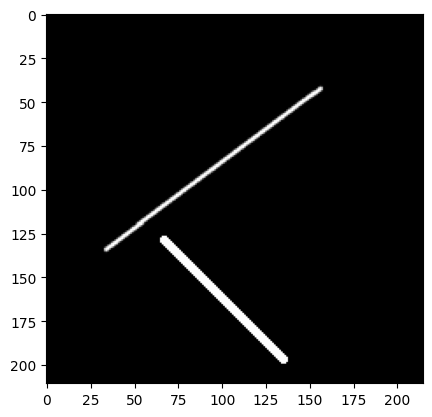

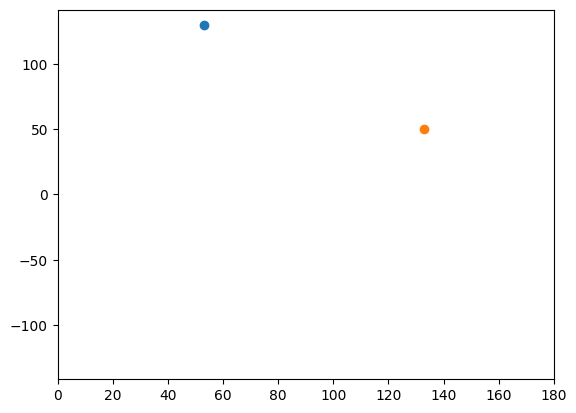

In [ ]:
# HoughLines transforms
img = cv2.imread('2lines.png')
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,10,np.pi/180,200)

# # Convert radian to degree
linesdegree = lines.copy()
linesdegree[:,0:1,1:2] =linesdegree[:,0:1,1:2]*180/np.pi

# plt.imshow(img)
# plt.show()
# # use scatter plot
for i in range(0,2):#len(linesdegree)):
	plt.scatter(linesdegree[i,0:1,1:2],linesdegree[i,0:1,0:1])

# # set x,y limits
plt.xlim(0, 180)
plt.ylim(-100*np.sqrt(2), 100*np.sqrt(2))
plt.show()


### Exercise #1

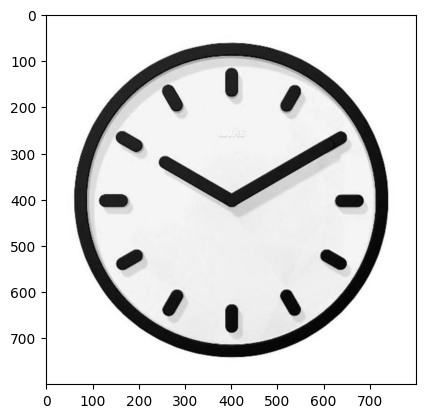

[[[555.          1.0471976]]

 [[155.          2.0943952]]

 [[535.          1.0471976]]]


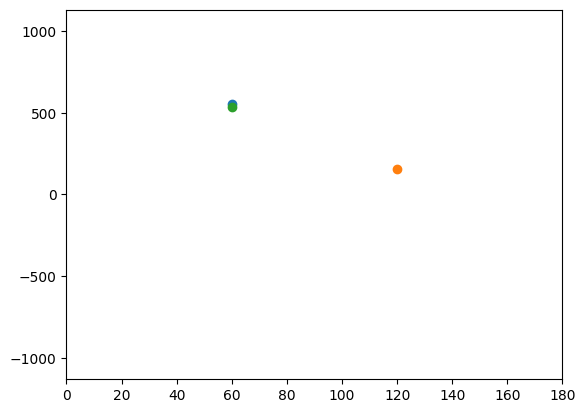

In [ ]:
img = cv2.imread('clock2.jpg')
plt.imshow(img)
plt.show()



gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
m,n = gray.shape
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,10,np.pi/180,500)
print(lines)
# # Convert radian to degree
linesdegree = lines.copy()
linesdegree[:,0:1,1:2] =linesdegree[:,0:1,1:2]*180/np.pi

# plt.imshow(img)
# plt.show()
# # use scatter plot
for i in range(0,len(linesdegree)):
	plt.scatter(linesdegree[i,0:1,1:2],linesdegree[i,0:1,0:1])

# # set x,y limits
plt.xlim(0, 180)
plt.ylim(-m*np.sqrt(2), m*np.sqrt(2))
plt.show()




## Hough circle transform
* https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

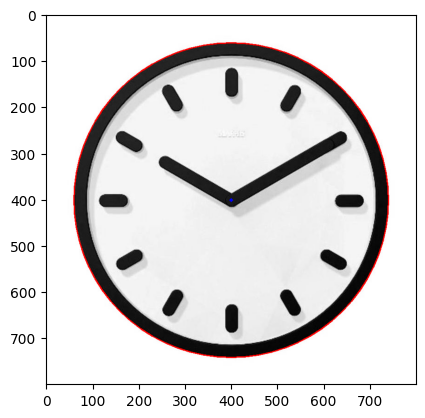

In [ ]:
img = cv2.imread('clock2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,150,apertureSize = 3)
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,500,
                            param1=50,param2=30,minRadius=200)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img)
plt.show()

## Threshold

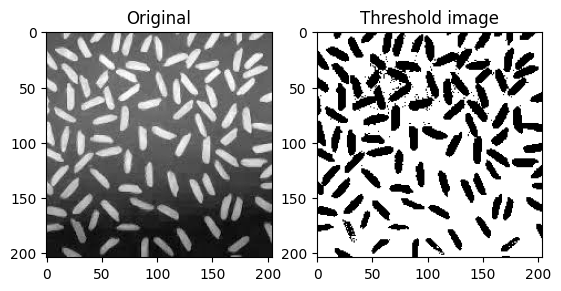

In [ ]:
img = cv2.imread("bacteria.png",0)
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)

plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.title("Original")
plt.subplot(1,2,2),plt.imshow(thresh1,'gray')
plt.title("Threshold image")
plt.show()



# ret,thresh1 = cv2.threshold(img,_________,255,cv2.THRESH_BINARY)

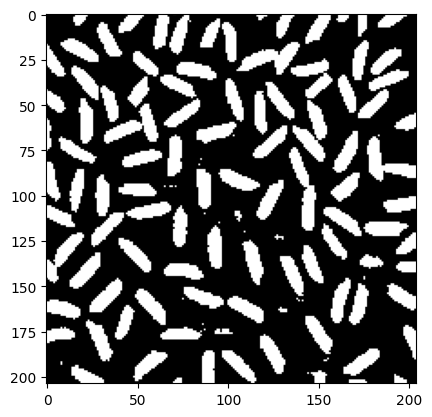

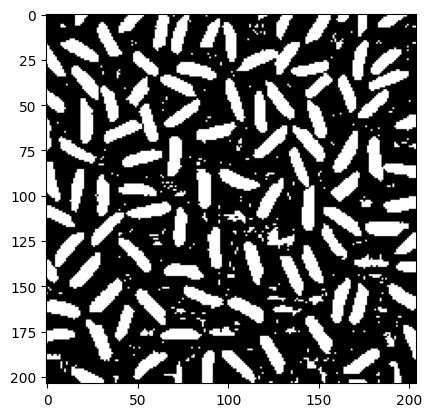

In [ ]:
img = cv2.imread("bacteria.png",0)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,21,0)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,21,0)


plt.imshow(th2,cmap='gray')
plt.show()

plt.imshow(th3,cmap='gray')
plt.show()

### Otsu's
* https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

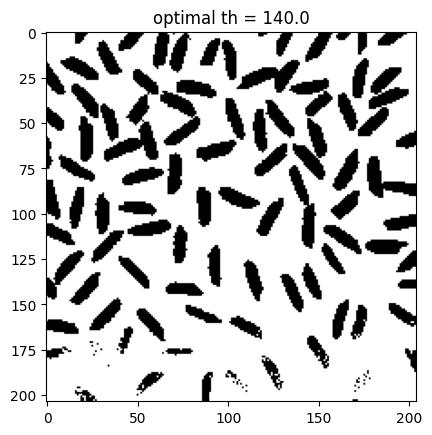

In [ ]:
img = cv2.imread("bacteria.png",0)

ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

plt.imshow(thresh1,cmap='gray')
plt.title("optimal th = " + str(ret))
plt.show()






## Region Growing


* https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

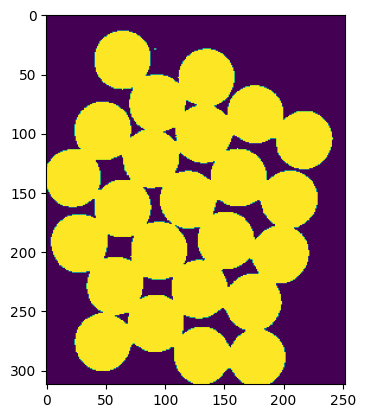

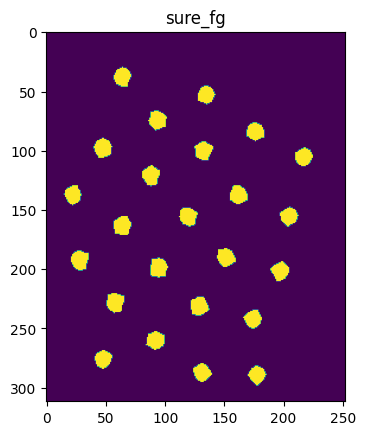

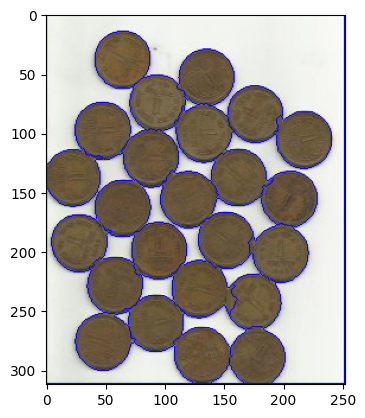

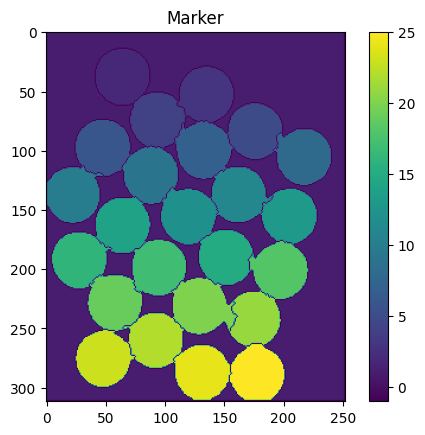

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh);plt.show()


# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,cv2.THRESH_BINARY)
plt.imshow(sure_fg);plt.title("sure_fg");plt.show()
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0] # BGR

plt.imshow(img[:,:,::-1]);plt.show()
plt.imshow(markers);plt.colorbar();plt.title("Marker");plt.show()